## Import Packages


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import (
    classification_report,
    recall_score,
    precision_score,
    confusion_matrix,
    accuracy_score,
    f1_score,
)
from sklearn.ensemble import VotingClassifier, StackingClassifier
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.combine import SMOTEENN

## Load data


In [2]:
pwd

'c:\\Users\\HP\\Desktop\\Binary Classification\\Introvert vs Extrovert\\notebook'

In [3]:
df = pd.read_csv("../data/raw/personality_dataset.csv")
df

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert
...,...,...,...,...,...,...,...,...
2895,3.0,No,7.0,6.0,No,6.0,6.0,Extrovert
2896,3.0,No,8.0,3.0,No,14.0,9.0,Extrovert
2897,4.0,Yes,1.0,1.0,Yes,4.0,0.0,Introvert
2898,11.0,Yes,1.0,3.0,Yes,2.0,0.0,Introvert


In [4]:
df["Personality"] = df["Personality"].str.lower().map({"extrovert": 0, "introvert": 1})
df["Personality"]

0       0
1       1
2       1
3       0
4       0
       ..
2895    0
2896    0
2897    1
2898    1
2899    0
Name: Personality, Length: 2900, dtype: int64

In [5]:
df.duplicated().sum()

np.int64(402)

In [6]:
# df = df.drop_duplicates()
# df.duplicated().sum()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2900 non-null   float64
 1   Stage_fear                 2900 non-null   object 
 2   Social_event_attendance    2900 non-null   float64
 3   Going_outside              2900 non-null   float64
 4   Drained_after_socializing  2900 non-null   object 
 5   Friends_circle_size        2900 non-null   float64
 6   Post_frequency             2900 non-null   float64
 7   Personality                2900 non-null   int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 181.4+ KB


In [8]:
df.describe()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency,Personality
count,2900.000000,2900.000000,2900.000000,2900.000000,2900.000000,2900.000000
mean,4.505816,3.963354,3.000000,6.268863,3.564727,0.485862
std,3.441180,2.872608,2.221597,4.232340,2.893587,0.499886
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,1.000000,3.000000,1.000000,0.000000
50%,4.000000,3.963354,3.000000,5.000000,3.000000,0.000000
75%,7.000000,6.000000,5.000000,10.000000,6.000000,1.000000
max,11.000000,10.000000,7.000000,15.000000,10.000000,1.000000


## Data Exploration


In [9]:
df.isna().sum()

Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64

In [10]:
df["Personality"].unique()

array([0, 1])

C:\Users\HP\AppData\Local\Temp\ipykernel_8580\3441918354.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Personality", data=df, palette="Set2")


<Axes: xlabel='Personality', ylabel='count'>

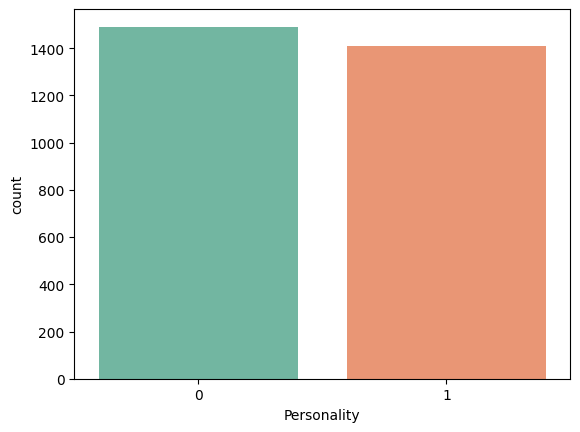

In [11]:
# Visualize target label
sns.countplot(x="Personality", data=df, palette="Set2")

<Axes: xlabel='Personality', ylabel='Time_spent_Alone'>

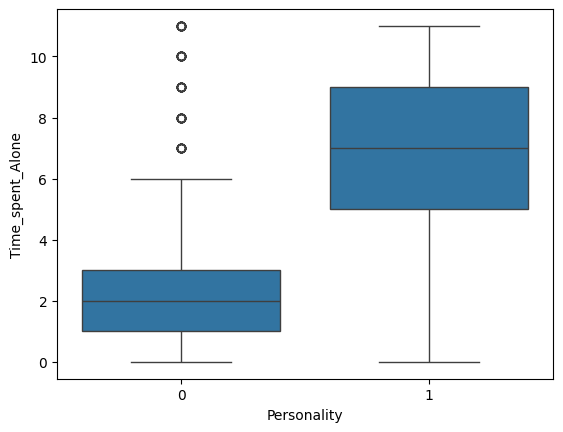

In [12]:
sns.boxplot(x="Personality", y="Time_spent_Alone", data=df)

<Axes: xlabel='Personality', ylabel='Friends_circle_size'>

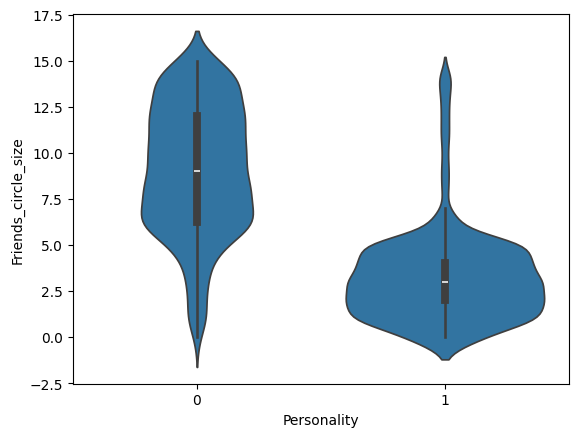

In [13]:
sns.violinplot(x="Personality", y="Friends_circle_size", data=df)

<Axes: xlabel='Friends_circle_size', ylabel='count'>

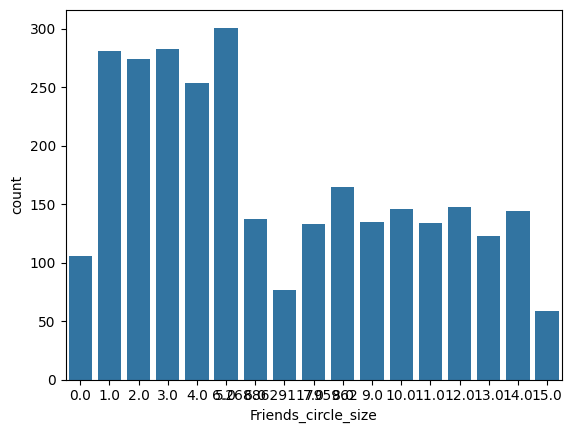

In [14]:
sns.countplot(
    x="Friends_circle_size",
    data=df,
)

In [15]:
# for col in df.columns[:-1]:
#      plt.plot(df[col], df["Personality"])

## Split into X and y


In [16]:
X = df.drop("Personality", axis=1)
y = df["Personality"]

In [17]:
X

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,4.0,No,4.0,6.0,No,13.0,5.0
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0
3,0.0,No,6.0,7.0,No,14.0,8.0
4,3.0,No,9.0,4.0,No,8.0,5.0
...,...,...,...,...,...,...,...
2895,3.0,No,7.0,6.0,No,6.0,6.0
2896,3.0,No,8.0,3.0,No,14.0,9.0
2897,4.0,Yes,1.0,1.0,Yes,4.0,0.0
2898,11.0,Yes,1.0,3.0,Yes,2.0,0.0


In [18]:
y

0       0
1       1
2       1
3       0
4       0
       ..
2895    0
2896    0
2897    1
2898    1
2899    0
Name: Personality, Length: 2900, dtype: int64

## Split into train and test


In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [20]:
y_train

2078    0
163     1
1938    1
252     1
2232    1
       ..
1638    0
1095    0
1130    1
1294    1
860     1
Name: Personality, Length: 2320, dtype: int64

## Scale data & Convert boolean columns


In [21]:
cols_to_encode = ["Stage_fear", "Drained_after_socializing"]

cols_to_scale = [
    "Time_spent_Alone",
    "Social_event_attendance",
    "Going_outside",
    "Friends_circle_size",
    "Post_frequency",
]

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(), cols_to_encode),
        ("num", StandardScaler(), cols_to_scale),
    ]
)

## Build model


### XGBOOST


In [22]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [25, 50, 75],
    "learning_rate": [0.01, 0.1, 0.5],
    "max_depth": [3, 6, 9],
}

grid_search = GridSearchCV(
    param_grid=param_grid, estimator=XGBClassifier(random_state=42), cv=3
)

In [18]:
grid_search.fit(X_train, y_train)

,estimator,"XGBClassifier...ree=None, ...)"
,param_grid,"{'learning_rate': [0.01, 0.1, ...], 'max_depth': [3, 6, ...], 'n_estimators': [25, 50, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'binary:logistic'


In [20]:
grid_search.best_estimator_

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=25, max_depth=3, learning_rate=0.1, random_state=42)
xgb.fit(X_train_scaled, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [25]:
y_pred = xgb.predict(X_test_scaled)

In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87       278
           1       0.93      0.79      0.86       302

    accuracy                           0.86       580
   macro avg       0.87      0.87      0.86       580
weighted avg       0.87      0.86      0.86       580



#### XGB pipeline


In [23]:
pipe = Pipeline(
    [
        ("process", preprocessor),
        (
            "model",
            XGBClassifier(
                n_estimators=25, max_depth=3, learning_rate=0.1, random_state=42
            ),
        ),
    ]
)

pipe.fit(X_train, y_train)

,steps,"[('process', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [24]:
y_pred = pipe.predict(X_test)

### Save model


In [26]:
import joblib

joblib.dump(pipe, "xgb_testing.pkl")

['xgb_testing.pkl']

In [35]:
# ...existing code...
import joblib
import pandas as pd

input_data = {
    "Time_spent_Alone": [4.0],
    "Stage_fear": ["No"],
    "Social_event_attendance": [4.0],
    "Going_outside": [6.0],
    "Drained_after_socializing": ["No"],
    "Friends_circle_size": [13.0],
    "Post_frequency": [5.0],
}
data = pd.DataFrame(input_data)

pipe = joblib.load("xgb_testing.pkl")
pred_num = pipe.predict(data)

label_map = {0: "Extrovert", 1: "Introvert"}  # must match your training mapping
pred_labels = [label_map.get(int(p), "Unknown") for p in pred_num]

# If you want confidence (probability) shown as well:
if hasattr(pipe, "predict_proba"):
    probs = pipe.predict_proba(data)
    confidences = probs.max(axis=1)
    print([f"{lab} (conf={conf:.2f})" for lab, conf in zip(pred_labels, confidences)])
else:
    print(pred_labels)
# ...existing code...

['Extrovert (conf=0.90)']


In [36]:
probs

array([[0.90179527, 0.09820474]], dtype=float32)

In [ ]:
print(classification_report(y_test, y_pred))
metrics = pd.DataFrame(
    {
        "Metric": ["recall", "Precision", "f1_score", "Accuracy"],
        "Scores": [
            recall_score(y_test, y_pred),
            precision_score(y_test, y_pred),
            f1_score(y_test, y_pred),
            accuracy_score(y_test, y_pred),
        ],
    }
)
metrics

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       302
           1       0.92      0.94      0.93       278

    accuracy                           0.93       580
   macro avg       0.93      0.93      0.93       580
weighted avg       0.93      0.93      0.93       580



,Metric,Scores
0,recall,0.938849
1,Precision,0.915789
2,f1_score,0.927176
3,Accuracy,0.929310


In [64]:
confusion_matrix(y_test, y_pred)

array([[278,  24],
       [ 17, 261]])

### RandomForestClassifier


In [ ]:
from sklearn.ensemble import RandomForestClassifier

lr = RandomForestClassifier(random_state=42)
lr.fit(X_train_scaled, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [136]:
y_pred = lr.predict(X_test_scaled)

In [ ]:
print(classification_report(y_test, y_pred))
metrics = pd.DataFrame(
    {
        "Metric": ["recall", "Precision", "f1_score", "Accuracy"],
        "Scores": [
            recall_score(y_test, y_pred),
            precision_score(y_test, y_pred),
            f1_score(y_test, y_pred),
            accuracy_score(y_test, y_pred),
        ],
    }
)
metrics

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       302
           1       0.91      0.93      0.92       278

    accuracy                           0.92       580
   macro avg       0.92      0.92      0.92       580
weighted avg       0.92      0.92      0.92       580



,Metric,Scores
0,recall,0.931655
1,Precision,0.911972
2,f1_score,0.921708
3,Accuracy,0.924138


In [138]:
confusion_matrix(y_test, y_pred)

array([[277,  25],
       [ 19, 259]])

### Gradient Boosting


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

pipe = Pipeline(
    [("process", preprocessor), ("gdb", GradientBoostingClassifier(random_state=42))]
)

pipe.fit(X_train, y_train)

,steps,"[('process', ...), ('gdb', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('encode', ...), ('scaler', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [150]:
y_pred = pipe.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))
metrics = pd.DataFrame(
    {
        "Metric": ["recall", "Precision", "f1_score", "Accuracy"],
        "Scores": [
            recall_score(y_test, y_pred),
            precision_score(y_test, y_pred),
            f1_score(y_test, y_pred),
            accuracy_score(y_test, y_pred),
        ],
    }
)
metrics

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       302
           1       0.92      0.94      0.93       278

    accuracy                           0.93       580
   macro avg       0.93      0.93      0.93       580
weighted avg       0.93      0.93      0.93       580



,Metric,Scores
0,recall,0.938849
1,Precision,0.915789
2,f1_score,0.927176
3,Accuracy,0.929310


In [152]:
confusion_matrix(y_test, y_pred)

array([[278,  24],
       [ 17, 261]])

## Build VotingClassifier Pipeline


In [ ]:
xgb = XGBClassifier(n_estimators=25, max_depth=3, learning_rate=0.1, random_state=42)
rf = RandomForestClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)
voting = VotingClassifier(estimators=[("xgb", xgb), ("rf", rf)], voting="hard")
stack = StackingClassifier(
    estimators=[("xgb", gb), ("rf", rf)], final_estimator=xgb, cv=5
)

pipe = Pipeline([("trans", preprocessor), ("model", stack)])

In [160]:
pipe.fit(X_train, y_train)

,steps,"[('trans', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('encode', ...), ('scaler', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [161]:
y_pred = pipe.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))
metrics = pd.DataFrame(
    {
        "Metric": ["recall", "Precision", "f1_score", "Accuracy"],
        "Scores": [
            recall_score(y_test, y_pred),
            precision_score(y_test, y_pred),
            f1_score(y_test, y_pred),
            accuracy_score(y_test, y_pred),
        ],
    }
)
metrics

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       302
           1       0.91      0.94      0.93       278

    accuracy                           0.93       580
   macro avg       0.93      0.93      0.93       580
weighted avg       0.93      0.93      0.93       580



,Metric,Scores
0,recall,0.938849
1,Precision,0.912587
2,f1_score,0.925532
3,Accuracy,0.927586


In [163]:
confusion_matrix(y_test, y_pred)

array([[277,  25],
       [ 17, 261]])

In [ ]:
            precision    recall  f1-score   support

           0       0.94      0.92      0.93       302
           1       0.92      0.94      0.93       278

    accuracy                           0.93       580
   macro avg       0.93      0.93      0.93       580
weighted avg       0.93      0.93      0.93       580

Metric	Scores
0	recall	0.938849
1	Precision	0.915789
2	f1_score	0.927176
3	Accuracy	0.929310
